# Latihan-11_2Dwedge_agilestyle (FOR PRACTICE AT HOME)

Latihan ini untuk pemodelan 2D wedge model menggunakan teknik Agile library atau code untu latihan di rumah
<br><br> _citation for this page: "Adi Widyantoro, 2021, Pertamina Seismic QI Course, Latihan-11_2Dwedge_agilestyle, accessed MM DD, YYYY."_  
<br>
>(update terakhir tanggal 1 Juli 2021 oleh Adi Widyantoro)
<hr>

_special notes_: brugeslibrary adalah kumpulan pre-defined functions oleh Agile Geoscience bruges:
https://github.com/agile-geoscience/bruges
        
the library's credits go to bruges contributors: Evan Bianco, Ben Bougher, Matt Hall, Alessandro Amato del Monte, Wes Hamlyn, Sean Ross-Ross

# STEP-1 Creating an earth model

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

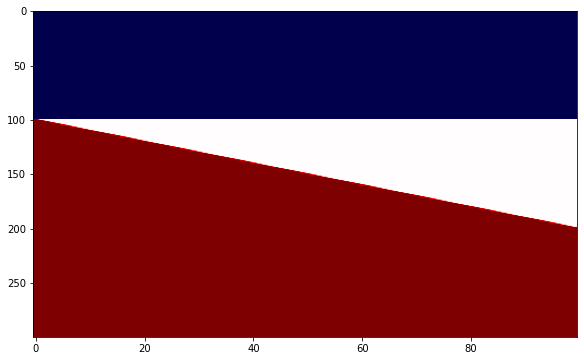

In [25]:
length, depth, wedge = 100, 300, -100    #change wedge to shift the start point
model = 1 + np.tri(depth, length, wedge, dtype=int)
model[:depth//3,:] = 0
plt.subplots(figsize=(12, 6))
plt.imshow(model, cmap='seismic', interpolation=None, aspect=0.2)
plt.show()

# STEP-2 Populate Elastic Properties

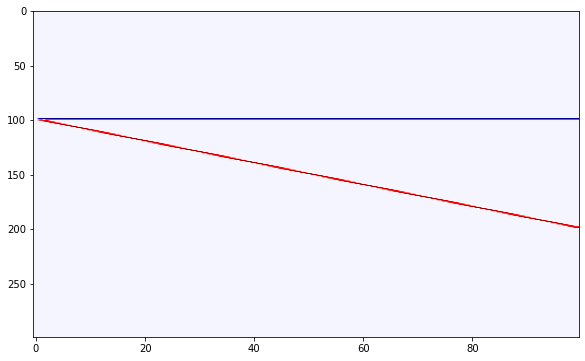

In [26]:
model[200]  # ndarray with shape 300x100
layer3 = np.array([[3200, 2950],  # Vp, rho values Top Layer, Mid Layer, Base Layer (Top and Base could be the same)
                  [2400, 2450],
                  [3200, 3000]])
earthmodel = layer3[model]
imp = np.apply_along_axis(np.product, -1, earthmodel)
rc =  (imp[1:,:] - imp[:-1,:]) / (imp[1:,:] + imp[:-1,:])
plt.subplots(figsize=(12, 6))
plt.imshow(rc, cmap='seismic', aspect=0.2)
plt.show()

# Step-3 Use a Wavelet and Create Synthetic

Use predefined Scipy.signal ricker or the “Mexican hat wavelet”. with function: A (1 - x^2/a^2) exp(-x^2/2 a^2) where A = 2/sqrt(3a)pi^1/4

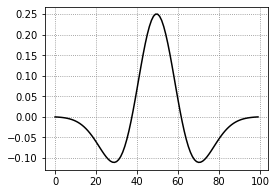

In [23]:
points, a = 100, 12.0
ricker = signal.ricker(points, a)
plt.subplots(figsize=(4, 3))
plt.plot(ricker,'k'); plt.grid(linestyle=":", color="gray")
plt.show()

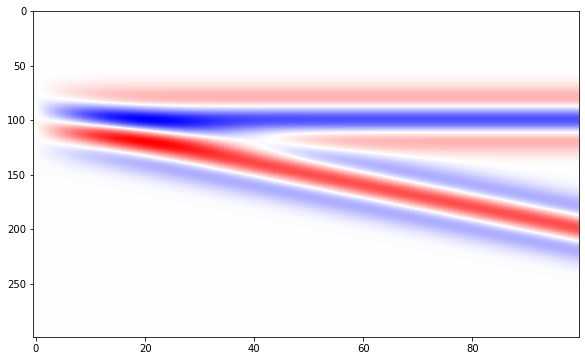

In [24]:
synth = np.apply_along_axis(lambda t: np.convolve(t, ricker, mode='same'), axis=0, arr=rc)
plt.subplots(figsize=(12, 6))
plt.imshow(synth, cmap="bwr", aspect=0.2)
plt.show()

<h1><center>-Akhir Program Latihan-11-<center></h1>